In [ ]:
!apt-get install libeccodes-tools

In [ ]:
!pip install pdbufr

In [ ]:
!pip install cartopy

In [2]:
#### link :: https://confluence.ecmwf.int/display/ECC/bufr_dump
#### success

# !apt-get install libeccodes-tools
#### jf :: json flat
!bufr_dump -jf "C:\Users\Administrator\Downloads\GII_09-45__2024-02-02.bufr" >  "C:\Users\Administrator\Downloads\GII_09-45__2024-02-02.json"
#### jf :: json all
# !bufr_dump -ja "drive/MyDrive/GII_09-45__2024-02-02.bufr" >  "drive/MyDrive/GII_09-45__2024-02-02.json"

In [2]:
import pdbufr
df = pdbufr.read_bufr('C:/Users/Administrator/Downloads/GII_09-45__2024-02-02.bufr', columns=("latitude", "longitude", "kIndex", "parcelLiftedIndexTo500Hpa", "precipitableWater"))
print(df)


         latitude  longitude  kIndex  parcelLiftedIndexTo500Hpa  \
0        23.40893  -19.82246      -6                          6   
1        23.40893  -19.82246      -6                          6   
2        23.40893  -19.82246      -6                          6   
3        23.41195  -18.22351      -8                          8   
4        23.41195  -18.22351      -8                          8   
...           ...        ...     ...                        ...   
1379929 -23.53902    0.09505       5                          3   
1379930 -23.53902    0.09505       5                          3   
1379931 -23.43919    0.14954       5                          3   
1379932 -23.43919    0.14954       5                          3   
1379933 -23.43919    0.14954       5                          3   

         precipitableWater  
0                     0.56  
1                     3.94  
2                     7.57  
3                     0.47  
4                     3.44  
...                  

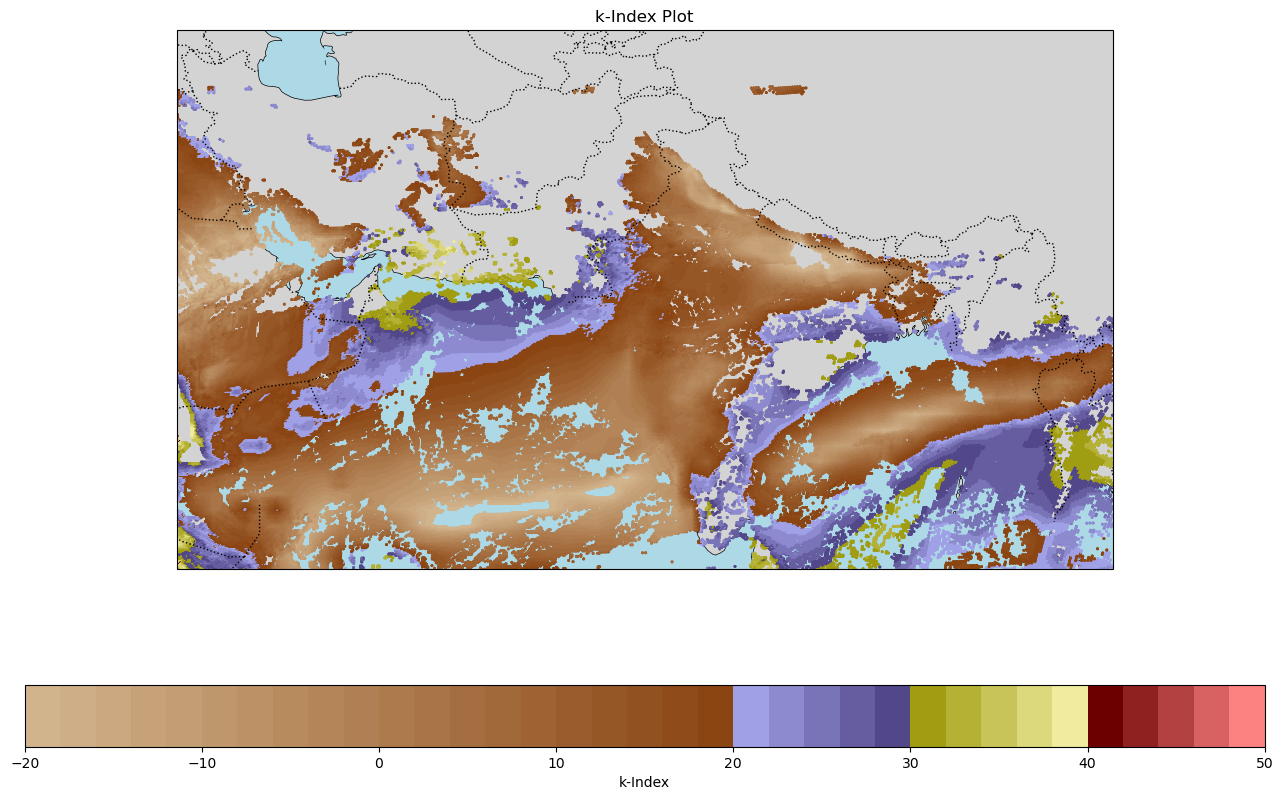

In [3]:
#K-Index
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap

# Read BUFR data
# (Assuming 'df' is already defined)
productKey = 'kIndex'
productLabel = 'k-Index'
imagePath = 'T:/Mohsin/SATMET_PRODUCTS/GII_PRODUCT/GII_kIndex_09-45__2024-02-02.webp'
# Set latitude and longitude bounds
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
minMaxVal = [-20 , 50]
ranges = [-20, -10, 0, 10, 20, 30, 40, 50]
# Filter data based on latitude and longitude range
filtered_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
    & (df[productKey] >= minMaxVal[0])
    & (df[productKey] <= minMaxVal[1])
]

# Create the base map
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]])

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

brown_cmap = LinearSegmentedColormap.from_list('brown', ['#D2B48C', '#8B4513'], N=20)
purple_cmap = LinearSegmentedColormap.from_list('blue', ['#A0A0E6', '#524788'], N=5)
yellow_cmap = LinearSegmentedColormap.from_list('green', ['#A09D12', '#F0EB9F'], N=5)
red_cmap = LinearSegmentedColormap.from_list('red', ['#6C0000', '#FC8282'], N=5)

# Combine the custom colormaps into one
combined_cmap = ListedColormap(np.concatenate([
    brown_cmap(np.linspace(0, 1, 20)),
    purple_cmap(np.linspace(0, 1, 5)),
    yellow_cmap(np.linspace(0, 1, 5)),
    red_cmap(np.linspace(0, 1, 5)),
]))

# Define color ranges and corresponding normalization values
norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])

# Plot the KIndex with the combined custom colormap
sc = ax.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df[productKey],
                cmap=combined_cmap, transform=ccrs.PlateCarree(), s=1, norm=norm)

fig.savefig(imagePath, format='webp', dpi=300, bbox_inches='tight',pad_inches=0)

# Add a colorbar with fixed ticks and labels
cbar = plt.colorbar(sc, ticks=ranges, orientation='horizontal')
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

plt.show()


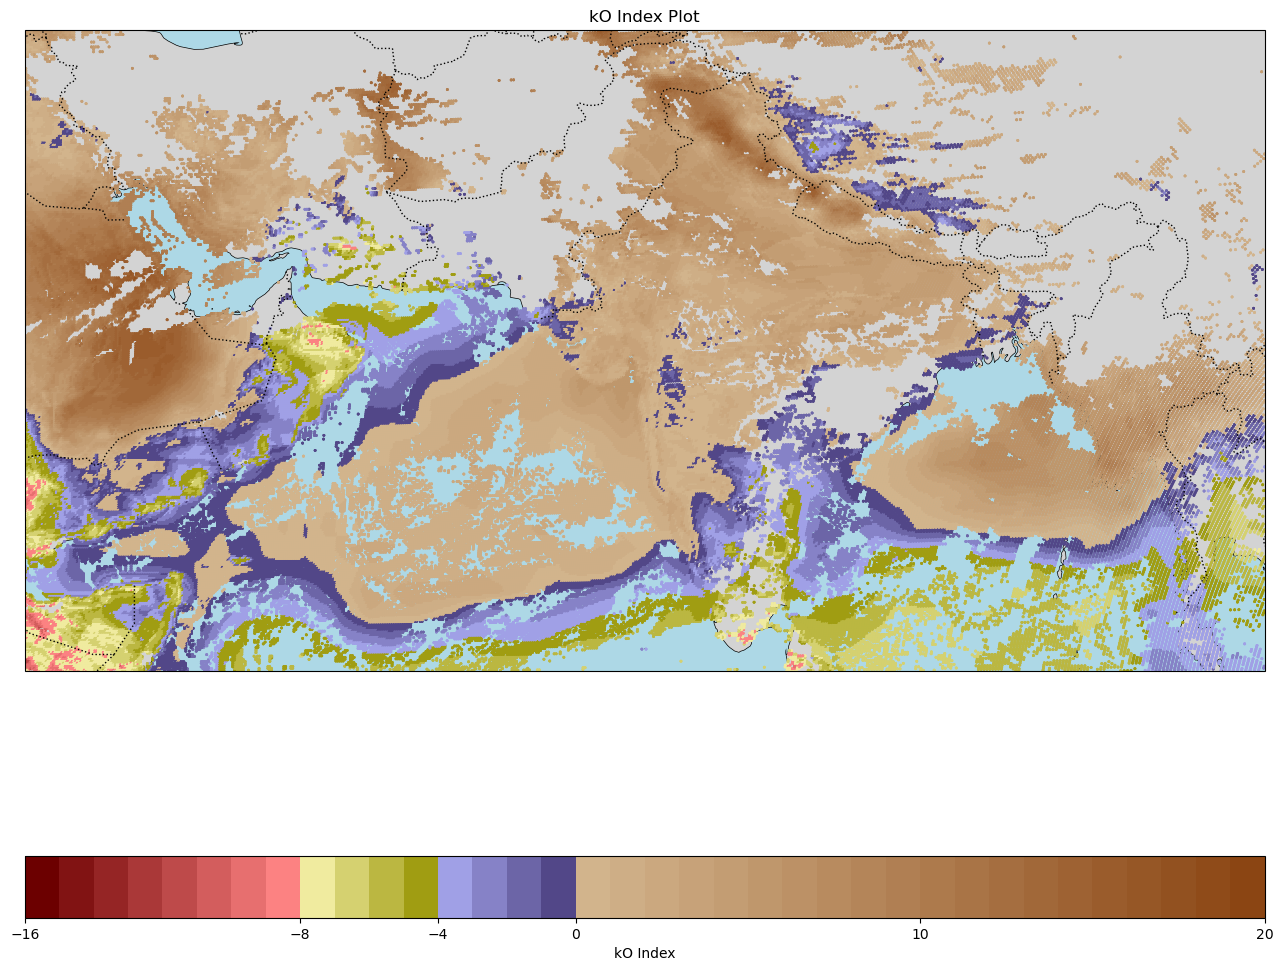

In [4]:
# KO-INDEX
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap, LinearSegmentedColormap

# Read BUFR data
# (Assuming 'df' is already defined)
productKey = 'parcelLiftedIndexTo500Hpa'
productLabel = 'kO Index'
imagePath = 'T:/Mohsin/SATMET_PRODUCTS/GII_PRODUCT/GII_kOIndex_09-45__2024-02-02.webp'

# Set latitude and longitude bounds
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
ranges = [-16 , -8 , -4 , 0 , 10 , 20]
minMaxVal = [-16 , 20]
# Filter data based on latitude and longitude range
filtered_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
    & (df[productKey] >= minMaxVal[0])
    & (df[productKey] <= minMaxVal[1])
]

# Create the base map
fig = plt.figure(figsize=(16, 16))
# fig.set_size_inches(15, 8.5)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]- 3.4])

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

brown_cmap = LinearSegmentedColormap.from_list('brown', ['#D2B48C', '#8B4513'], N=20)
purple_cmap = LinearSegmentedColormap.from_list('blue', ['#A0A0E6', '#524788'], N=4)
yellow_cmap = LinearSegmentedColormap.from_list('green', ['#F0EB9F', '#A09D12'], N=4)
red_cmap = LinearSegmentedColormap.from_list('red', ['#6C0000', '#FC8282'], N=8)

# Combine the custom colormaps into one
combined_cmap = ListedColormap(np.concatenate([
    red_cmap(np.linspace(0, 1, 8)),
    yellow_cmap(np.linspace(0, 1, 4)),
    purple_cmap(np.linspace(0, 1, 4)),
    brown_cmap(np.linspace(0, 1, 20)),
]))

# Define color ranges and corresponding normalization values
norm = Normalize(vmin=minMaxVal[0], vmax=minMaxVal[1])

# Plot the KIndex with the combined custom colormap
sc = ax.scatter(filtered_df['longitude'], filtered_df['latitude'], c=filtered_df[productKey],
                cmap=combined_cmap, transform=ccrs.PlateCarree(), s=1, norm=norm)

# Save the figure
fig.savefig(imagePath, format='webp', dpi=300, bbox_inches='tight',pad_inches=0)

## Add a colorbar with fixed ticks and labels
cbar = plt.colorbar(sc, ticks=ranges, orientation='horizontal')
cbar.set_label(productLabel)

## Add a title
plt.title(productLabel + ' Plot')

plt.show()


         latitude  longitude      kIndex  parcelLiftedIndexTo500Hpa  \
29367    23.47272  101.92325  2147483647                          1   
29368    23.47272  101.92325  2147483647                          1   
29369    23.47272  101.92325  2147483647                          1   
29418    23.57689  102.01413  2147483647                          0   
29419    23.57689  102.01413  2147483647                          0   
...           ...        ...         ...                        ...   
1216669  23.33630   43.84775  2147483647                 2147483647   
1216670  23.33630   43.84775  2147483647                 2147483647   
1216671  23.33656   43.75840  2147483647                 2147483647   
1216672  23.33656   43.75840  2147483647                 2147483647   
1216673  23.33656   43.75840  2147483647                 2147483647   

         precipitableWater  
29367                 0.41  
29368                14.12  
29369                 0.00  
29418                 0.38  
29

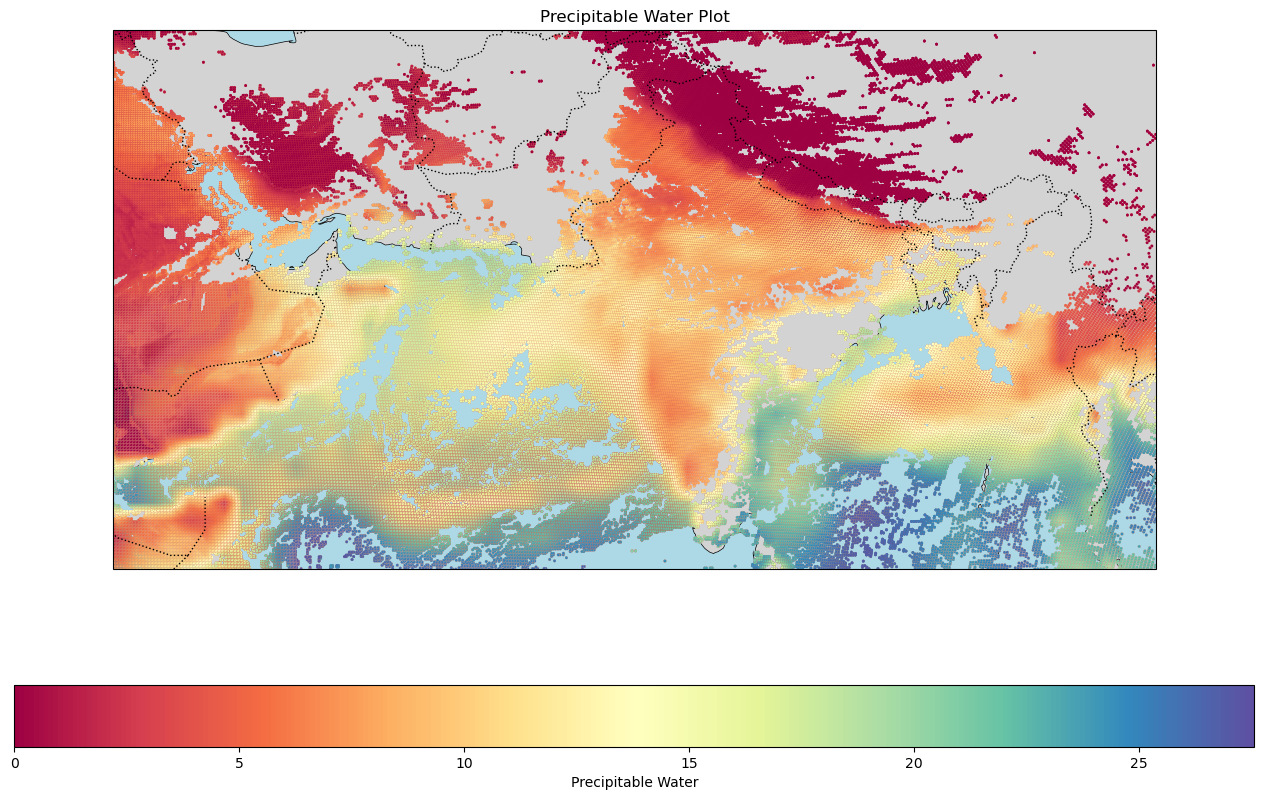

In [26]:
# GII - precipitableWater
import pdbufr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Read BUFR data
productKey = 'precipitableWater'
productLabel = 'Precipitable Water'
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
minMaxVal = []
imagePath = 'T:/Mohsin/SATMET_PRODUCTS/GII_PRODUCT/GII_PrecipitableWater_09-45__2024-02-02.webp'

#df = pdbufr.read_bufr('drive/MyDrive/GII.bufr', columns=("latitude", "longitude", "kIndex", "koIndex", "precipitableWater"))

# Filter data based on latitude and longitude range
filterd_df = df[
    (df['latitude'] >= latBound[0])
    & (df['latitude'] <= latBound[1])
    & (df['longitude'] >= lngBound[0])
    & (df['longitude'] <= lngBound[1])
]

print(filterd_df)
# Create the base map
fig = plt.figure(figsize=(16, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]- 3.4])

# Add map features
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgray')
# ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Plot the KIndex
# ValueError: 'coolwadrm' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',...

sc = ax.scatter(filterd_df['longitude'], filterd_df['latitude'], c=filterd_df[productKey], cmap='Spectral', transform=ccrs.PlateCarree(), s=1)

fig.savefig(imagePath, format='webp', dpi=300, bbox_inches='tight',pad_inches=0)

# Add a colorbar
cbar = plt.colorbar(sc,orientation='horizontal')
cbar.set_label(productLabel)

# Add a title
plt.title(productLabel + ' Plot')

# Show the plot
plt.show()
